#### save a list of dictionaries into a .csv file using python's csv lib
* refer to [this answer](https://stackoverflow.com/questions/3086973/how-do-i-convert-this-list-of-dictionaries-to-a-csv-file) for datails

In [ ]:
""" save a list of dicts into .csv file """

import csv

lst = [{'accuracy': 0.65625, 'loss': 0.9852703809738159}, {'accuracy': 0.75, 'loss': 0.7926470041275024}, {'accuracy': 0.78125, 'loss': 0.6472556591033936}, {'accuracy': 0.71875, 'loss': 0.8842955827713013}, {'accuracy': 0.78125, 'loss': 0.8109518885612488}, {'accuracy': 0.625, 'loss': 1.1132577657699585}, {'accuracy': 0.71875, 'loss': 0.6284990906715393}, {'accuracy': 0.84375, 'loss': 0.6642897129058838}, {'accuracy': 0.75, 'loss': 0.8352426886558533}, {'accuracy': 0.625, 'loss': 1.0439457893371582}, {'accuracy': 0.71875, 'loss': 0.7318465709686279}, {'accuracy': 0.75, 'loss': 0.9115254878997803}, {'accuracy': 0.6875, 'loss': 0.6738001108169556}, {'accuracy': 0.78125, 'loss': 0.5255595445632935}, {'accuracy': 0.75, 'loss': 0.7317112684249878}, {'accuracy': 0.71875, 'loss': 0.8124203681945801}]

# get headers from keys
headers = set().union(*(d.keys() for d in lst))

# add newline='' to remove added empty new lines after each row
with open('test.csv', 'a', newline='') as f:
    dict_writer = csv.DictWriter(f, headers)
    dict_writer.writeheader()
    dict_writer.writerows(lst)

In [ ]:
""" read .csv file into pandas DataFrame """
import pandas as pd

csv_file = './python-09-batch-summary.csv'
df = pd.read_csv(csv_file, sep=',', header=0)
# get dataframe column headers as a list (exclude index column)
headers = list(df)
print(headers)

In [124]:
""" get a data column by column header along with index columns """
import pandas as pd

csv_file = './python-09-batch-summary.csv'
df = pd.read_csv(csv_file, sep=',', header=0, index_col='iteration')
# returns a pd.Series object, if only 1 data column is selected
data = df['accuracy']

pandas.core.indexes.numeric.Int64Index

In [ ]:
""" sns line plots """
import seaborn as sns
import pandas as pd

csv_file = './python-09-batch-summary.csv'
df = pd.read_csv(csv_file, sep=',', header=0, index_col='iteration')
# returns a pd.Series object, if only 1 data column is selected
data = df['accuracy']
# build a lineplot
fig = sns.relplot(data=data, kind='line')

In [ ]:
""" sns.set_theme() """
import pandas as pd
import seaborn as sns

csv_file = './python-09-batch-summary.csv'
df = pd.read_csv(csv_file, sep=',', header=0, index_col='iteration')
# returns a pd.Series object, if only 1 data column is selected
data = df['accuracy']

# configure the rc parameters
axes_style = {
    'axes.facecolor': 'white',
    'axes.edgecolor': '.8',
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.labelcolor': '.15',
    'figure.facecolor': 'white',
    'grid.color': '.8',
    'grid.linestyle': '-',
    'text.color': '.15',
    'xtick.color': '.15',
    'ytick.color': '.15',
    # set ticks direction to be inward into the figure
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'w',
    'image.cmap': 'rocket',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'patch.force_edgecolor': True,
    'xtick.bottom': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True
}

plotting_context = {
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 10,
    'axes.linewidth': 3.0,
    'grid.linewidth': 1.0,
    'lines.linewidth': 2.0,
    'lines.markersize': 5.0,
    'patch.linewidth': 0.8,
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0.8,
    'xtick.major.size': 5.0,
    'ytick.major.size': 5.0,
    'xtick.minor.size': 3.0,
    'ytick.minor.size': 3.0
}
# set figure theme
sns.set(context=plotting_context, style=axes_style)
# build a lineplot
fig = sns.relplot(data=data, kind='line', height=5, aspect=1.2)
# configure y-axis range
fig.set(ylim=(0.5, 1.0))
# configure y-axis title
fig.set_ylabels("Accuracy")
# configure x-axis title
fig.set_xlabels("# of Iterations")

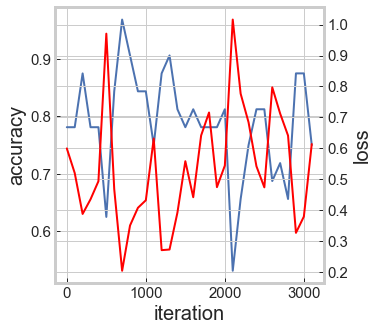

In [134]:
""" plot with 2nd y-axis """
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_file = './python-09-batch-summary.csv'
df = pd.read_csv(csv_file, sep=',', header=0, index_col='iteration')
df.reset_index(inplace=True)
# returns a pd.Series object, if only 1 data column is selected
fig = sns.relplot(data=df, x='iteration', y='accuracy', kind='line')
ax2 = plt.twinx()
sns.lineplot(data=df, x='iteration', y='loss', ax=ax2, color='red')